In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


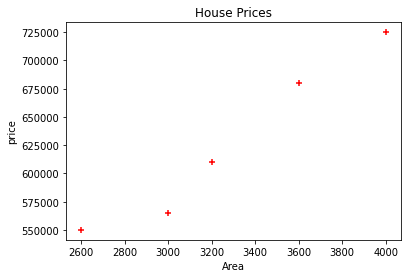

In [4]:
plt.xlabel("Area")
plt.ylabel("price")
plt.title("House Prices")
plt.scatter(df.area, df.price, color="red", marker = "+")

In [5]:
new_df = df.drop('price', axis='columns')
new_df
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
# Create linear Regression
reg = linear_model.LinearRegression()
reg.fit(new_df, price)
reg.predict([[3300]])

array([628715.75342466])

# save model using pickle

In [16]:
import pickle

In [18]:
with open("model_pickle","wb") as f:
    pickle.dump(reg,f)

In [11]:
with open("model_pickle","rb") as f:
    mp = pickle.load(f)

In [14]:
mp.predict([[3300]])

array([628715.75342466])

# save model using joblib

In [22]:
import joblib

In [23]:
joblib.dump(reg,"model_joblib")

['model_joblib']

In [25]:
mj = joblib.load("model_joblib")
mj.predict([[3300]])

array([628715.75342466])

In [29]:
df_areas = pd.read_csv("areas.csv")
df_areas['prices'] = mj.predict(df_areas[['area']])
df_areas

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05
